In [2]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from io import StringIO

In [13]:
test_data = """county_id,model_load_time_ms,model_score_time_ms
A,100.,2.
A,200,3
A,125,4
B,500,3
B,700,4
B,800,4
C,300,5
C,325,6
C,400,8
"""

In [14]:
df = pd.read_csv(StringIO(test_data))
df

,county_id,model_load_time_ms,model_score_time_ms
0,A,100.0,2.0
1,A,200.0,3.0
2,A,125.0,4.0
3,B,500.0,3.0
4,B,700.0,4.0
5,B,800.0,4.0
6,C,300.0,5.0
7,C,325.0,6.0
8,C,400.0,8.0


In [46]:
county_metrics = df.groupby(['county_id']).describe()
county_metrics

model_load_time_ms                                               \
                       count        mean         std    min    25%    50%   
county_id                                                                   
A                        3.0  141.666667   52.041650  100.0  112.5  125.0   
B                        3.0  666.666667  152.752523  500.0  600.0  700.0   
C                        3.0  341.666667   52.041650  300.0  312.5  325.0   

                        model_score_time_ms                                \
             75%    max               count      mean       std  min  25%   
county_id                                                                   
A          162.5  200.0                 3.0  3.000000  1.000000  2.0  2.5   
B          750.0  800.0                 3.0  3.666667  0.577350  3.0  3.5   
C          362.5  400.0                 3.0  6.333333  1.527525  5.0  5.5   

                          
           50%  75%  max  
county_id                 
A          3.0  3.5  4.0  
B          4.0  4.0  4.0  
C          6.0  7.0  8.0

In [47]:
metrics = county_metrics.unstack().reset_index()
metrics.columns = ['category', 'metric', 'county_id', 'value']
metrics.head()

,category,metric,county_id,value
0,model_load_time_ms,count,A,3.000000
1,model_load_time_ms,count,B,3.000000
2,model_load_time_ms,count,C,3.000000
3,model_load_time_ms,mean,A,141.666667
4,model_load_time_ms,mean,B,666.666667


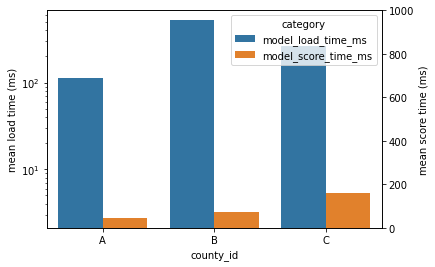

In [58]:
# Plot
fig, ax1 = plt.subplots()
g = sns.barplot(x="county_id", y="value", hue='category', ci=None,
                data=metrics, ax=ax1)
# width_scale = 0.45
# Create a second y-axis with the scaled ticks
ax1.set_ylabel('mean load time (ms)')
ax1.set_yscale('log')

ax2 = ax1.twinx() 
ax2.set_ylabel('mean score time (ms)')
ax2.set_ylim(0, 1000)
 
plt.show()

In [42]:
id(ax2.containers[0])

140708742237056

In [36]:
len(ax1.containers)

2

In [43]:
id(ax1.containers[0])

140708750533072